# Capital Bikeshare #40197091

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind  #for doing t-test for different values of a given factor
import seaborn as sns  #for plotting graphs 
from sklearn.linear_model import LinearRegression #Linear Regression Analysis
from sklearn.preprocessing import StandardScaler

## Loading our data

In [6]:
# Loading the datset & saving it in variable rental_data
# (file_name, 1) because our data is in sheet 2 of the Excel file
# Optionally can also write the name of the sheet instead of its positional number as 'Capital Bikeshare Demand Data'
rental_data = pd.read_excel('Data_Capital Bikeshare.xls', 1)

# Checking whether the data has been successfully uploaded & how it looks like!
rental_data.head()

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11


## Our data at a glance

In [3]:
print("Shape of our rental dataset is",rental_data.shape)
# Result is (n_rows, n_columns)

# Printing gap in between
print('\n')

# Concise info of all variables in our dataset
rental_data.info()
# () is COMPULSORY, if missed, gives another output!!!

print('\n')

# Statistical properties of our dataset
rental_data.describe()

Shape of our rental dataset is (17466, 17)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         17466 non-null  int64  
 1   month        17466 non-null  int64  
 2   day          17466 non-null  int64  
 3   hour         17466 non-null  int64  
 4   member       17466 non-null  int64  
 5   weekend      17466 non-null  int64  
 6   season       17466 non-null  object 
 7   temperature  17466 non-null  float64
 8   dewpoint     17466 non-null  float64
 9   humidity     17466 non-null  float64
 10  windspeed    17466 non-null  float64
 11  windgust     17466 non-null  float64
 12  pressure     17466 non-null  float64
 13  precip       17466 non-null  float64
 14  precipaccum  17466 non-null  float64
 15  weather      17466 non-null  int64  
 16  rental       17466 non-null  int64  
dtypes: float64(8), int64(8), object(1)
memory u

,year,month,day,hour,member,weekend,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
count,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000
mean,2017.246822,6.522902,15.704569,11.518321,317.602657,0.287759,15.557475,47.166089,65.172028,8.811951,3.095630,30.047717,0.003403,0.003845,1.774820,420.144910
std,0.662303,3.451445,8.791244,6.921848,315.397551,0.452731,9.794618,19.570545,19.549624,5.104676,8.664425,0.390741,0.029175,0.065460,0.703245,402.473513
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-12.780000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2017.000000,4.000000,8.000000,6.000000,63.000000,0.000000,7.780000,32.000000,49.000000,6.000000,0.000000,29.900000,0.000000,0.000000,1.000000,77.000000
50%,2017.000000,7.000000,16.000000,12.000000,244.000000,0.000000,16.670000,50.000000,66.000000,8.000000,0.000000,30.000000,0.000000,0.000000,2.000000,315.500000
75%,2018.000000,10.000000,23.000000,18.000000,455.750000,1.000000,23.890000,64.310000,82.000000,12.000000,0.000000,30.200000,0.000000,0.000000,2.000000,634.000000
max,2018.000000,12.000000,31.000000,23.000000,1639.000000,1.000000,36.110000,80.000000,100.000000,44.000000,59.000000,30.800000,1.320000,4.000000,4.000000,2038.000000


## Exploratory Data Analysis
### Relationship between columns

In [4]:
# Finding correlation between columns & assigning it to a variable 'corr'
corr = rental_data.corr()
corr

,year,month,day,hour,member,weekend,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
year,1.000000,-0.494905,-0.006042,0.001305,0.046954,-0.005066,0.158842,0.138467,0.002213,0.018100,-0.026859,-0.034161,0.048185,0.020505,0.099914,0.049387
month,-0.494905,1.000000,0.011066,0.000573,0.057252,0.011869,0.199249,0.224084,0.109435,-0.142640,-0.103700,0.030408,-0.005297,-0.001037,-0.086537,0.055686
day,-0.006042,0.011066,1.000000,0.000618,-0.002320,-0.006562,0.036208,0.054094,0.051912,-0.033371,-0.050054,-0.034008,-0.003456,0.001580,0.031017,0.000771
hour,0.001305,0.000573,0.000618,1.000000,0.323084,-0.000020,0.142570,-0.004444,-0.278239,0.142092,0.078160,-0.029812,0.029676,-0.031316,0.010122,0.363905
member,0.046954,0.057252,-0.002320,0.323084,1.000000,-0.164824,0.338026,0.176099,-0.239208,0.072611,0.016156,-0.031217,-0.062733,0.070652,-0.084110,0.954563
weekend,-0.005066,0.011869,-0.006562,-0.000020,-0.164824,1.000000,-0.031836,-0.022559,0.010819,0.004502,-0.006284,0.037644,0.009964,0.004960,0.013804,-0.043583
temperature,0.158842,0.199249,0.036208,0.142570,0.338026,-0.031836,1.000000,0.895460,0.114917,-0.096464,-0.161721,-0.197323,0.027358,0.006241,0.028037,0.436376
dewpoint,0.138467,0.224084,0.054094,-0.004444,0.176099,-0.022559,0.895460,1.000000,0.535793,-0.214140,-0.270499,-0.206571,0.083016,0.026616,0.192758,0.231299
humidity,0.002213,0.109435,0.051912,-0.278239,-0.239208,0.010819,0.114917,0.535793,1.000000,-0.295875,-0.294027,-0.101087,0.149021,0.049996,0.405950,-0.300233
windspeed,0.018100,-0.142640,-0.033371,0.142092,0.072611,0.004502,-0.096464,-0.214140,-0.295875,1.000000,0.637837,-0.100773,0.037512,0.005748,0.032689,0.082088


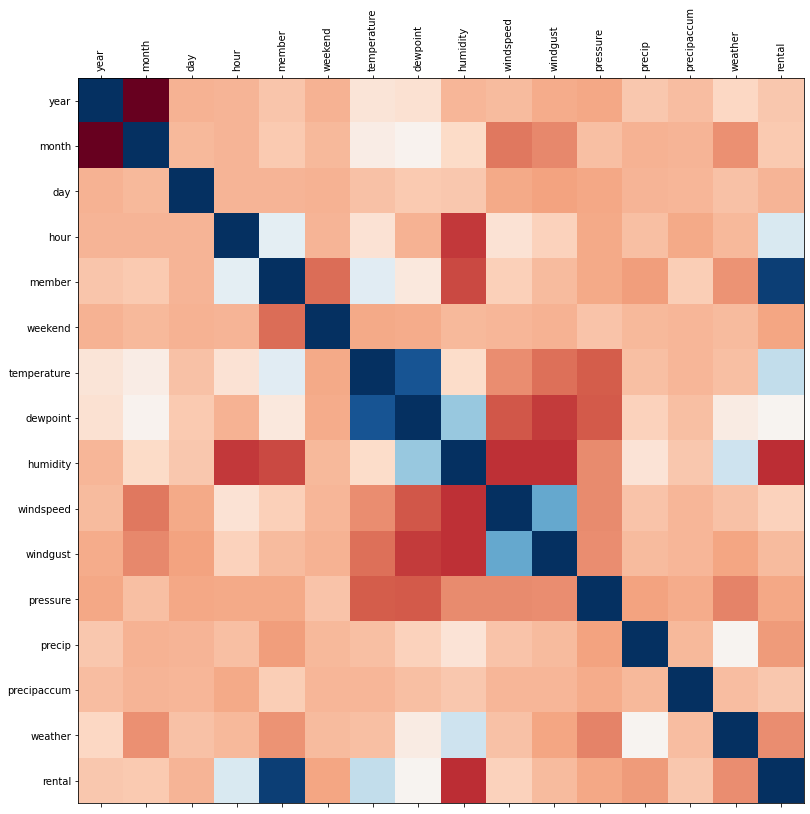

In [5]:
#Plotting a visual grid for correlation
fig = plt.figure(figsize=(13,13))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)  #Blue = High, Red = Low
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

Insights:
* Hour & tempature shows weak relationship with the amount of rentals
* Membership shows strong relationship with the amount of rentals
* Humidity shows negative relationship with the amount of rentals

All these relationships need to be confirmed with further analysis

### Seasonal affect on rentals

In [6]:
def t_test(season1, season2):
    stat, p_value = ttest_ind(season1, season2, alternative = 'two-sided')
    alpha = 0.05
    if p_value > alpha:
        print('t-test: Same distribution', p_value)
    else:
        print('t-test: Different distribution', p_value)

The lower the p-value, the stronger the evidence against the null hypothesis.\
When the p-value is below 0.05 (95% CI), the null hypothesis can be rejected.

In [7]:
# Defining variables for seasons
rental_winter = rental_data.rental[rental_data['season'] == 'winter']
rental_spring = rental_data.rental[rental_data['season'] == 'spring']
rental_summer = rental_data.rental[rental_data['season'] == 'summer']
rental_fall = rental_data.rental[rental_data['season'] == 'fall'] 

print('Winter vs Spring:')
t_test(rental_winter, rental_spring)

print('Winter vs Summer:')
t_test(rental_winter, rental_summer)

print('Winter vs Fall:')
t_test(rental_winter, rental_fall)

print('Spring vs Fall:')
t_test(rental_spring, rental_fall)

print('Spring vs Summer:')
t_test(rental_spring, rental_summer)

print('Summer vs Fall:')
t_test(rental_summer, rental_fall)

Winter vs Spring:
t-test: Different distribution 1.231608317014292e-118
Winter vs Summer:
t-test: Different distribution 2.4689528017609174e-281
Winter vs Fall:
t-test: Different distribution 2.9628377484760385e-143
Spring vs Fall:
t-test: Different distribution 0.032942691200162584
Spring vs Summer:
t-test: Different distribution 1.5417463185338164e-37
Summer vs Fall:
t-test: Different distribution 6.790728152657897e-27


#### Does season affects rentals?
<font color ="green"><h3>YES</h3></font>
<p>As all distributions are different, we are sure that season affects the volume of rentals.</p>

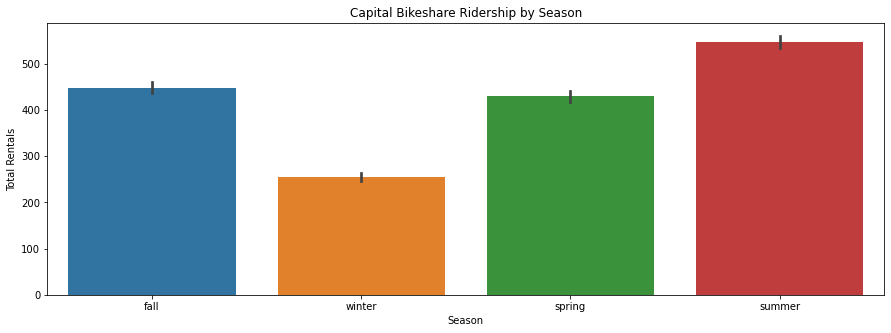

In [8]:
# Plotting histogram for seasonal affects
fig = plt.subplots(figsize = (15, 5))
sns.barplot(data=rental_data[['season','rental']],
            x='season', y='rental'
           )

#Labelling & title
plt.title('Capital Bikeshare Ridership by Season')
plt.ylabel('Total Rentals')
plt.xlabel('Season')

#Showing the plot
plt.show()

**Conclusion:**\
Summer has the highest rentals & Winter has the lowest rentals. Fall & Spring has almost same rentals.

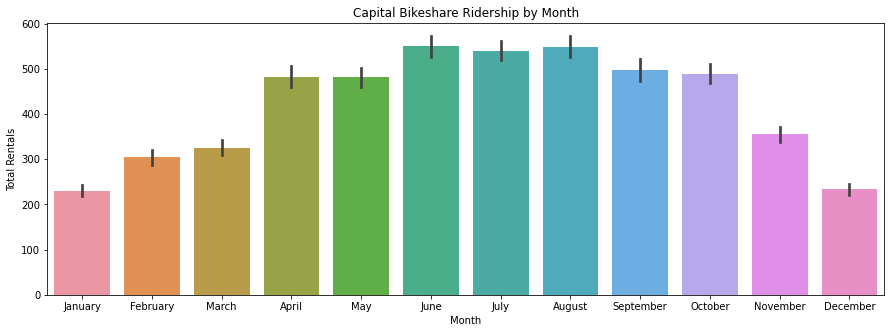

In [9]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(data=rental_data[['month','rental']], 
            x='month', y='rental', ax=ax)

plt.title('Capital Bikeshare Ridership by Month')
plt.ylabel('Total Rentals')
plt.xlabel('Month')

#Assigning numbers to month names
tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  #Index starting from 0
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab)  # Matching index no. to month name for X-labels

plt.show()

### Hourly affect on rentals

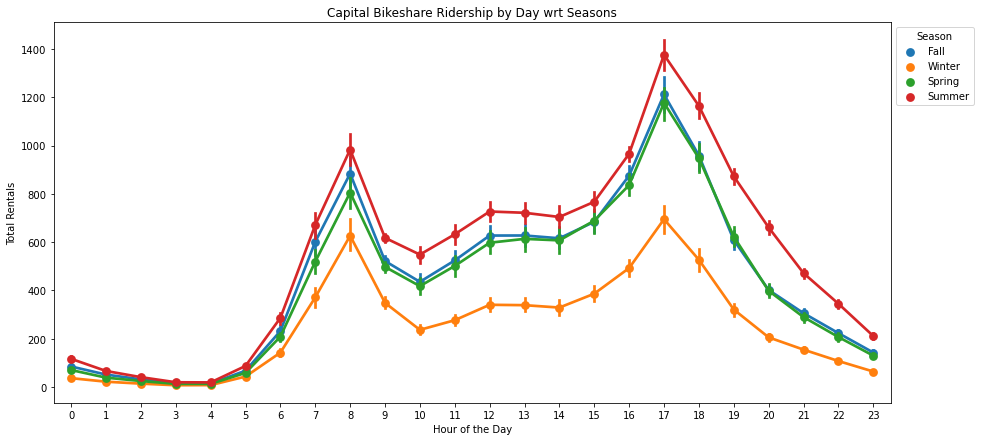

In [10]:
# Rentals per hour in different seasons

fig, ax = plt.subplots(figsize = (15, 7))
sns.pointplot(data = rental_data[['hour', 'rental', 'season']],
              x='hour', y='rental', hue='season',
              ax=ax)

plt.title('Capital Bikeshare Ridership by Day wrt Seasons')
plt.ylabel('Total Rentals')
plt.xlabel('Hour of the Day')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles,  ['Fall', 'Winter', 'Spring', 'Summer'], title='Season', bbox_to_anchor=(1, 1), loc=2)

plt.show()

Insights:\
Total Rentals follow similar hourly fashion in different seasons. So, there is no significant effect of season on hourly demand.
* **Peak demand:** around 8 AM & 5 PM, with 5 PM being the most popular(except winters, where demands at both times are similar)
* **Least demand:** 3-4 AM
* **Rise in demand:** 4-8 AM & 2-5 PM
* **Decrease in demand:** 8-10 AM & 5-11 PM\
This data can be used to provide hourly/short-term promotional offers.

### Membership affect on rentals

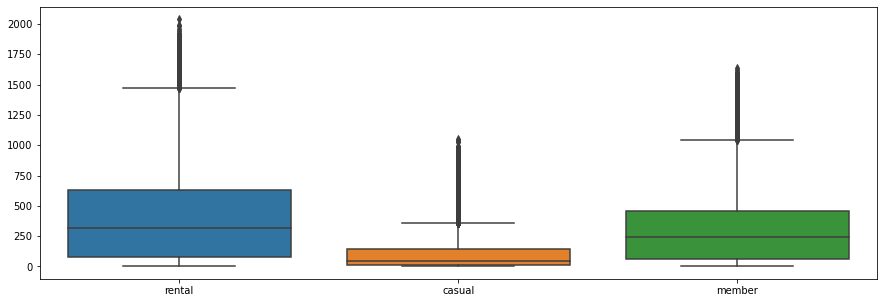

In [11]:
#Creating a table of members and non-members data
rental_member = pd.concat([rental_data['rental'], rental_data['member']], axis = 'columns')
rental_member['casual'] = rental_member['rental'] - rental_member['member']

#Boxplot for the data
fig = plt.subplots(figsize = (15, 5))
sns.boxplot(data = rental_member[['rental', 'casual', 'member']])
plt.show()

In [12]:
#Looking whether significant difference exists
print('Members vs Casual Riders:')
t_test(rental_member['member'], rental_member['casual'])

Members vs Casual Riders:
t-test: Different distribution 0.0


#### Does membership status affects rentals?
<font color ="green"><h3>YES</h3></font>
<p>With a very small p-value in t-test, we can be sure that most rentals are due to usage of the service by the members.</p>

## Data Modelling
### Preprocessing

In [78]:
#Creating duplicate for model without affecting the original
rental_model = rental_data.copy()
rental_model

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,2018,9,30,19,416,1,fall,21.67,60.0,68.0,5.0,0.0,30.3,0.0,0.0,2,541
17462,2018,9,30,20,278,1,fall,21.67,61.0,70.0,3.0,0.0,30.3,0.0,0.0,2,379
17463,2018,9,30,21,233,1,fall,21.11,62.0,76.0,6.0,0.0,30.3,0.0,0.0,2,301
17464,2018,9,30,22,148,1,fall,20.00,63.0,84.0,8.0,0.0,30.3,0.0,0.0,2,203


**Data Cleaning:**
Converting the season column into integer data for modelling purposes using One Hot Encoding method

In [79]:
#Create dummies for categorical columns
dummies_season = pd.get_dummies(rental_model.season)  #Season column
dummies_weather = pd.get_dummies(rental_model.weather)  #Weather column
dummies_month = pd.get_dummies(rental_model.month)  #Month column
dummies_hour = pd.get_dummies(rental_model.hour)  #Hour column

#Renaming dummies columns as column names should not be integers
dummies_month=dummies_month.rename({1:'m1',2:'m2',3:'m3',4:'m4',5:'m5',6:'m6',
                                    7:'m7',8:'m8',9:'m9',10:'m10',11:'m11',12:'m12'},
                                   axis= 'columns')
dummies_hour=dummies_hour.rename({0:'h0', 1:'h1',2:'h2',3:'h3',4:'h4',5:'h5',6:'h6', 7:'h7',8:'h8',9:'h9',10:'h10',11:'h11',
                                  12:'h12', 13:'h13', 14:'h14', 15:'h15', 16:'h16', 17:'h17', 18:'h18', 19:'h19', 20:'h20',
                                 21:'h21', 22:'h22', 23:'h23'},
                                   axis= 'columns')
dummies_weather=dummies_weather.rename({1:'w1',2:'w2',3:'w3',4:'w4'},
                                   axis= 'columns')

#Merging dummies data to our model data
rental_model = pd.concat([rental_model, dummies_season, dummies_weather, dummies_month, dummies_hour],
                         axis = 'columns')

#Dropping season column & 1 dummy column for each categoryfor avoiding non-collinearity error
rental_model = rental_model.drop(['season', 'winter',
                                  'month', 'm12',
                                  'hour', 'h23',
                                  'weather', 'w4'], 
                                 axis = 'columns')

In [80]:
#Defining outcome of the model
outcome = 'rental'  # dependent variable

#Defining features of the model
feature = [i 
           for i in list(rental_model)
          if i not in [outcome]]  #independent variables

### Linear Regression

In [81]:
from sklearn.model_selection import train_test_split  #Training the variables

#Defining the variables
y = rental_model[outcome]
x = rental_model[feature]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [82]:
#Modelling
rental_lr = LinearRegression()
rental_lr.fit(x_train, y_train)

LinearRegression()

Coefficients of the equation

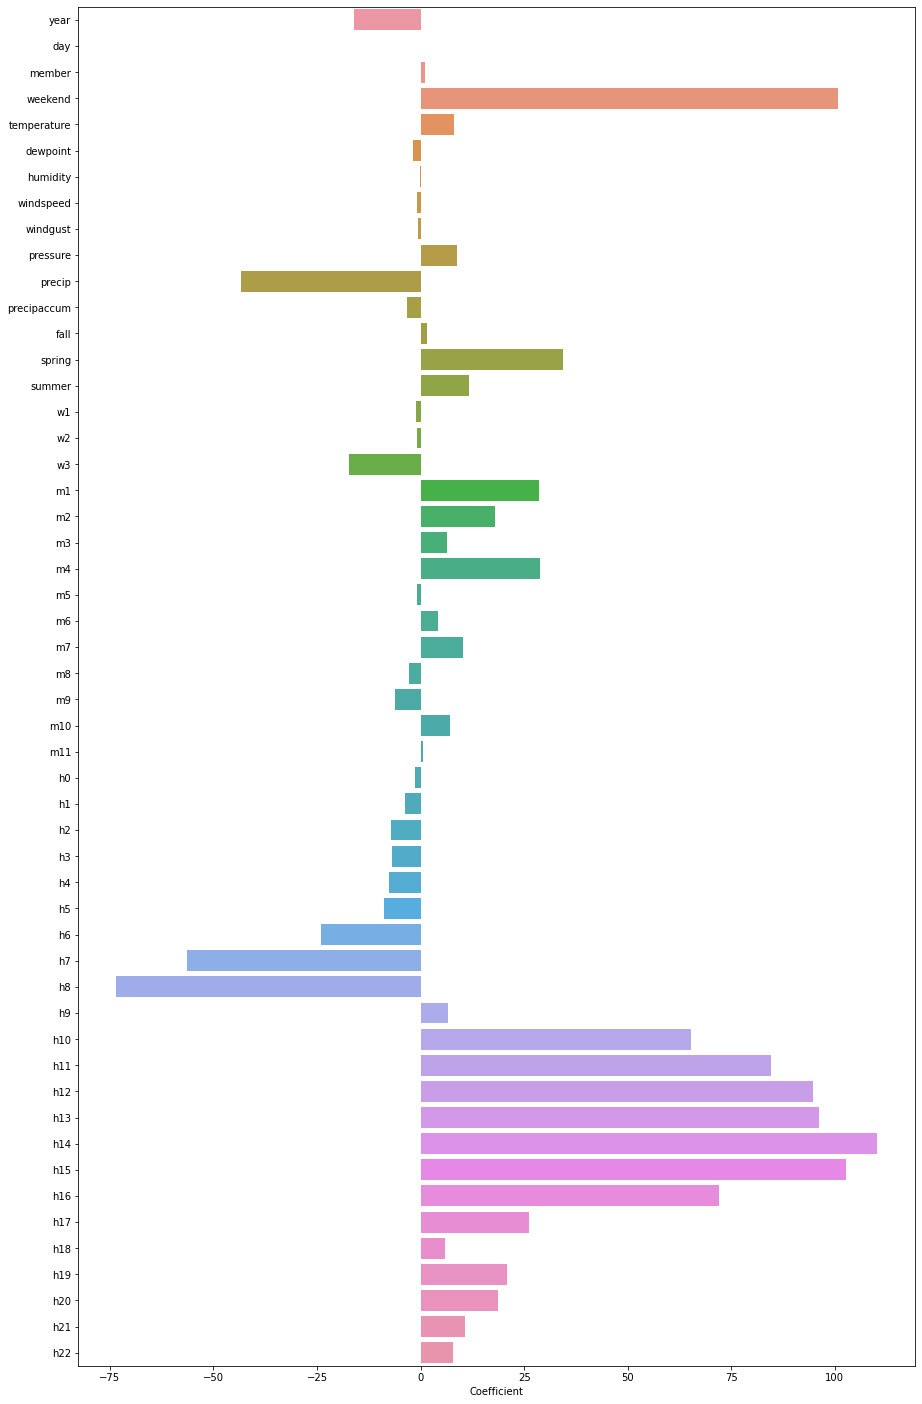

In [83]:
#Plotting 
plt.figure(figsize = (15,25))
coeff = pd.DataFrame(rental_lr.coef_, index = x.columns, columns = ['Coefficient'])
sns.barplot(y = coeff.index, x = 'Coefficient', data = coeff)
plt.show()

In [84]:
#Intercept of the equation
rental_lr.intercept_

32097.02618251461

In [85]:
#Prediction score
rental_lr.score(x,y)

0.9613665388628447

In [86]:
#Root Mean Square Error
from sklearn.metrics import mean_squared_error
y_pred = rental_lr.predict(x)
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y, y_pred)))

RMSE: 79.11
